# 2.3 Stopwords
In this lesson we'll be using the nltk package to remove stop words from text.

Stop words are common words in the language which don't carry much meaning e.g. "and", "of", "a", "to".


In [1]:
# import packages
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [2]:
# assign our stop words to a variable
en_stopwords = stopwords.words('english')

In [3]:
# print the list of stop words to see what we will be removing
print(en_stopwords)

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she

In [4]:
sentence = "it was too far to go to the shop and he did not want her to walk"

In [5]:
# keep the words in the sentance if the word is not in the list of stop words
sentance_no_stopwords = ' '.join([word for word in sentence.split() if word not in (en_stopwords)])
print(sentance_no_stopwords)

far go shop want walk


In [6]:
# removing stop words from list
en_stopwords.remove("did")
en_stopwords.remove("not")

In [7]:
# add custom stop words
en_stopwords.append("go")

In [8]:
sentance_no_stopwords_custom = ' '.join([word for word in sentence.split() if word not in (en_stopwords)])
print(sentance_no_stopwords_custom)

far shop did not want walk


# Regular expression

Regular expressions, or "regex" for short, is a special syntax for searching for strings that meets a specified pattern. It's a great tool to filter and sort through text when you want to match patterns rather than a hard coded string or strings.

In [2]:
import re



In [3]:
#We can use the 'r' character before strings to indicate to python that our text is what is known as a "raw string".

# print text without using raw string indicator
my_folder = "C:\desktop\notes"
print(my_folder)

C:\desktop
otes


In [4]:
# include raw string indicator
my_folder = r"C:\desktop\notes"
print(my_folder)

C:\desktop\notes


In [8]:
result_search = re.search("pattern", r"string containing the pattern")
print(result_search)

<re.Match object; span=(22, 29), match='pattern'>


In [9]:
print(result_search.group()) # returns just the matching pattern


pattern


In [11]:
result_search = re.search("pattern",r"the phrase to find isn't in this string")
print(result_search) # returns None

None


In [12]:
#re.sub
#re.sub allows us to find certain text and replace it. It uses the logic re.sub("pattern to find", "replacement text", "string").

string = r"sara was able to help me find the items i needed quickly"
new_string = re.sub(r"sara", r"sarah", string) # replace the incorrect spelling of sarah
print(new_string)

sarah was able to help me find the items i needed quickly


In [13]:
#Regex Syntax
#The real power of regex is being able to leverage the syntax to create more complex searches/replacements.

customer_reviews = ['sam was a great help to me in the store', 
                    'the cashier was very rude to me, I think her name was eleanor', 
                    'amazing work from sadeen!', 
                    'sarah was able to help me find the items i needed quickly', 
                    'lucy is such a great addition to the team', 
                    'great service from sara she found me what i wanted'
                   ]

In [25]:
sarahs_reviews = []
pattern_to_find = r"sarah?" 
# the ? after h means it is an optional character to match, so our search will look for sarah and sara

In [26]:
for string in customer_reviews:
    if (re.search(pattern_to_find, string)):
        sarahs_reviews.append(string)
print(sarahs_reviews)

['sarah was able to help me find the items i needed quickly', 'great service from sara she found me what i wanted']


In [27]:
#Find reviews that start with the letter a
a = []
x=r"^a" # the ^ operator to indicates the start of a string
for i in customer_reviews:
    if (re.search(x,i)):
        a.append(i)
print(a)

['amazing work from sadeen!']


In [28]:
#Find reviews that end with the letter y

y_reviews = []
pattern_to_find = r"y$" # the $ operator to indicate the end of a string
for string in customer_reviews:
    if (re.search(pattern_to_find, string)):
        y_reviews.append(string)
print(y_reviews)

['sarah was able to help me find the items i needed quickly']


In [31]:
#Find reviews that contain the words needed or wanted

needwant_reviews = []
pattern_to_find = r"(need|want)ed" # the pipe operator | can be used to mean OR
for string in customer_reviews:
    if (re.search(pattern_to_find, string)):
        needwant_reviews.append(string)
print(needwant_reviews)

['sarah was able to help me find the items i needed quickly', 'great service from sara she found me what i wanted']


In [32]:
#Remove anything from the review that isn't a word or a space (i.e. remove punctuation)

no_punct_reviews = []
pattern_to_find = r"[^\w\s]" 
# [^ ] means "not", \w means word and \s means whitespace: so find anything that is not a word or a space
for string in customer_reviews:
    no_punct_string = re.sub(pattern_to_find, "", string)
    no_punct_reviews.append(no_punct_string)
print(no_punct_reviews)

['sam was a great help to me in the store', 'the cashier was very rude to me I think her name was eleanor', 'amazing work from sadeen', 'sarah was able to help me find the items i needed quickly', 'lucy is such a great addition to the team', 'great service from sara she found me what i wanted']


# Tokenization

In [1]:
import nltk
nltk.download('punkt_tab')
from nltk.tokenize import word_tokenize, sent_tokenize

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


In [2]:
sentences = "Her cat's name is Luna. Her dog's name is max"
sent_tokenize(sentences)

["Her cat's name is Luna.", "Her dog's name is max"]

In [3]:
sentence = "Her cat's name is Luna"
word_tokenize(sentence)

['Her', 'cat', "'s", 'name', 'is', 'Luna']

In [4]:
sentence_2 = "Her cat's name is Luna and her dog's name is max"
word_tokenize(sentence_2)

['Her',
 'cat',
 "'s",
 'name',
 'is',
 'Luna',
 'and',
 'her',
 'dog',
 "'s",
 'name',
 'is',
 'max']

# Stemming
The next step in preprocessing is to standardise the text. One option for this is stemming, where words are reduced to their base form. For example, words like ‘connecting’ or ‘connected’ will be stemmed to the base form ‘connect’. Stemming works by removing suffix/ending of word but can sometimes lead to the base form not being meaningful or a proper word.

We standardize the text in this way because it will lower the number of unique words in our dataset; therefore reducing the size and complexity of our data. Removing complexity and noise from the data is an important step for preparing our data properly for machine learning.

In [5]:
from nltk.stem import PorterStemmer
# create stemmer
ps = PorterStemmer()
connect_tokens = ['connecting', 'connected', 'connectivity', 'connect', 'connects']
for t in connect_tokens:
    print(t, " : ", ps.stem(t))

connecting  :  connect
connected  :  connect
connectivity  :  connect
connect  :  connect
connects  :  connect


In [6]:
learn_tokens = ['learned', 'learning', 'learn', 'learns', 'learner', 'learners']

In [7]:
for t in learn_tokens:
    print(t, " : ", ps.stem(t))

learned  :  learn
learning  :  learn
learn  :  learn
learns  :  learn
learner  :  learner
learners  :  learner


In [9]:
likes_tokens = ['likes', 'better', 'worse']
for t in likes_tokens:
    print(t, " : ", ps.stem(t))

likes  :  like
better  :  better
worse  :  wors


# Lemmatization
Where stemming removes the last few characters of a word, lemmatization stems the word to a more meaningful base form and ensures it does not lose it's meaning. Lemmatization works more intelligently, referencing a pre-defined dictionary containing the context of words and uses this when diminishing the word to the base form.

In [13]:
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...


In [14]:
# create lemmatizer 
lemmatizer = WordNetLemmatizer()
for t in connect_tokens:
    print(t, " : ", lemmatizer.lemmatize(t))

connecting  :  connecting
connected  :  connected
connectivity  :  connectivity
connect  :  connect
connects  :  connects


In [15]:
for t in learn_tokens:
    print(t, " : ", lemmatizer.lemmatize(t))

learned  :  learned
learning  :  learning
learn  :  learn
learns  :  learns
learner  :  learner
learners  :  learner


In [16]:
for t in likes_tokens:
    print(t, " : ", lemmatizer.lemmatize(t))

likes  :  like
better  :  better
worse  :  worse


# N-Grams
We can break our text down into n-grams to check our preprocessing, explore the contents of our data, or create new features for machine learning. An n-gram is simply a sequence of neighbouring n words (or tokens), where n can be any number.

In [17]:
import nltk
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
tokens = ['the', 'rise', 'of', 'artificial', 'intelligence', 'has', 'led', 'to', 'significant', 'advancements', 'in', 'natural', 'language', 'processing', 'computer', 'vision', 'and', 'other', 'fields', 'machine', 'learning', 'algorithms', 'are', 'becoming', 'more', 'sophisticated', 'enabling', 'computers', 'to', 'perform', 'complex', 'tasks', 'that', 'were', 'once', 'thought', 'to', 'be', 'the', 'exclusive', 'domain', 'of', 'humans', 'with', 'the', 'advent', 'of', 'deep', 'learning', 'neural', 'networks', 'have', 'become', 'even', 'more', 'powerful', 'capable', 'of', 'processing', 'vast', 'amounts', 'of', 'data', 'and', 'learning', 'from', 'it', 'in', 'ways', 'that', 'were', 'not', 'possible', 'before', 'as', 'a', 'result', 'ai', 'is', 'increasingly', 'being', 'used', 'in', 'a', 'wide', 'range', 'of', 'industries', 'from', 'healthcare', 'to', 'finance', 'to', 'transportation', 'and', 'its', 'impact', 'is', 'only', 'set', 'to', 'grow', 'in', 'the', 'years', 'to', 'come']
print(tokens)

['the', 'rise', 'of', 'artificial', 'intelligence', 'has', 'led', 'to', 'significant', 'advancements', 'in', 'natural', 'language', 'processing', 'computer', 'vision', 'and', 'other', 'fields', 'machine', 'learning', 'algorithms', 'are', 'becoming', 'more', 'sophisticated', 'enabling', 'computers', 'to', 'perform', 'complex', 'tasks', 'that', 'were', 'once', 'thought', 'to', 'be', 'the', 'exclusive', 'domain', 'of', 'humans', 'with', 'the', 'advent', 'of', 'deep', 'learning', 'neural', 'networks', 'have', 'become', 'even', 'more', 'powerful', 'capable', 'of', 'processing', 'vast', 'amounts', 'of', 'data', 'and', 'learning', 'from', 'it', 'in', 'ways', 'that', 'were', 'not', 'possible', 'before', 'as', 'a', 'result', 'ai', 'is', 'increasingly', 'being', 'used', 'in', 'a', 'wide', 'range', 'of', 'industries', 'from', 'healthcare', 'to', 'finance', 'to', 'transportation', 'and', 'its', 'impact', 'is', 'only', 'set', 'to', 'grow', 'in', 'the', 'years', 'to', 'come']


In [19]:
# unigrams: n=1
unigrams = (pd.Series(nltk.ngrams(tokens, 1)).value_counts()) 
print(unigrams)

(to,)          7
(of,)          6
(in,)          4
(the,)         4
(learning,)    3
              ..
(domain,)      1
(years,)       1
(complex,)     1
(become,)      1
(led,)         1
Length: 79, dtype: int64


Text(0.5, 0, '# of Occurances')

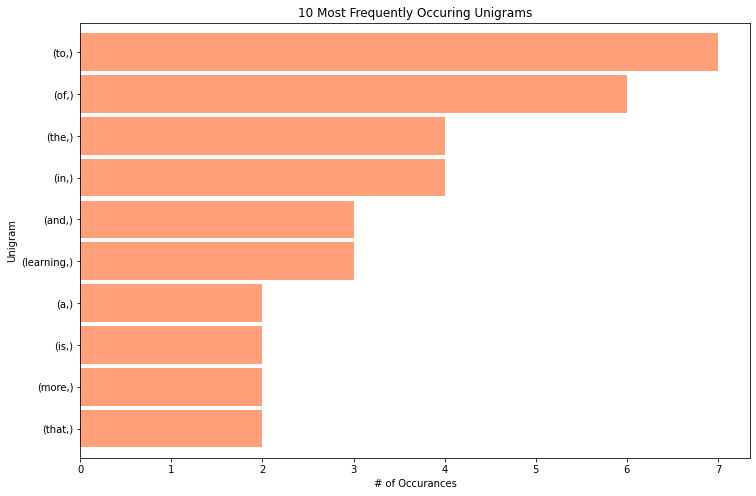

In [20]:
unigrams[0:10].sort_values().plot.barh(color='lightsalmon', width=.9, figsize=(12, 8))
plt.title('10 Most Frequently Occuring Unigrams')
plt.ylabel('Unigram')
plt.xlabel('# of Occurances')

In [21]:
# bigrams: n=2
bigrams = (pd.Series(nltk.ngrams(tokens, 2)).value_counts()) 
print(bigrams)

(that, were)                   2
(significant, advancements)    1
(advancements, in)             1
(range, of)                    1
(more, sophisticated)          1
                              ..
(sophisticated, enabling)      1
(the, advent)                  1
(perform, complex)             1
(it, in)                       1
(in, natural)                  1
Length: 105, dtype: int64


Text(0.5, 0, '# of Occurances')

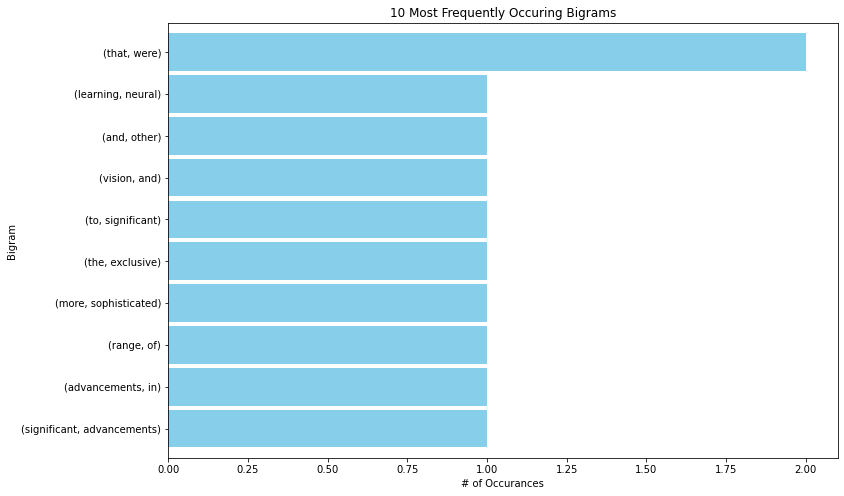

In [22]:
bigrams[0:10].sort_values().plot.barh(color='skyblue', width=.9, figsize=(12, 8))
plt.title('10 Most Frequently Occuring Bigrams')
plt.ylabel('Bigram')
plt.xlabel('# of Occurances')

In [23]:
# trigrams: n=3
trigrams = (pd.Series(nltk.ngrams(tokens, 3)).value_counts()) 
print(trigrams)

(the, years, to)                   1
(the, advent, of)                  1
(of, humans, with)                 1
(natural, language, processing)    1
(industries, from, healthcare)     1
                                  ..
(learning, algorithms, are)        1
(computers, to, perform)           1
(to, grow, in)                     1
(domain, of, humans)               1
(other, fields, machine)           1
Length: 105, dtype: int64
